# Projet Data Science - COVID-19

Tomás Mejia, Antoine Balannec, Alexandre Le Borgne, Sébastien Hierso


## Datasets:

data datasoft: https://public.opendatasoft.com/explore/dataset/covid-19-pandemic-worldwide-data/export/?disjunctive.zone&disjunctive.category&refine.zone=France

data gouv: https://github.com/opencovid19-fr/data


In [314]:
!pip install folium

## Import des librairies nécessaires 

In [324]:
import pandas as pd
import numpy as np
import folium
import matplotlib as plot

# 1ère Partie

# Mise en évidence géographique des cas dans les Dom-Tom et la france métropolitaine

## Ouverture des données

In [316]:
map_df = pd.read_csv("datasets/covid-19-pandemic-worldwide-data-fr.csv",";")
df2 = pd.DataFrame(map_df)
df2


,Zone,Sub Zone,Category,Date,Count,Location
0,France,French Guiana,Deaths,2020-04-03,0,"3.9339,-53.1258"
1,France,French Guiana,Deaths,2020-04-16,0,"3.9339,-53.1258"
2,France,French Guiana,Deaths,2020-03-20,0,"3.9339,-53.1258"
3,France,French Guiana,Deaths,2020-04-17,0,"3.9339,-53.1258"
4,France,French Guiana,Deaths,2020-07-21,39,"3.9339,-53.1258"
...,...,...,...,...,...,...
8311,France,Guadeloupe,Deaths,2020-09-24,42,"16.265,-61.551"
8312,France,Guadeloupe,Deaths,2020-02-13,0,"16.265,-61.551"
8313,France,Guadeloupe,Deaths,2020-06-01,14,"16.265,-61.551"
8314,France,Guadeloupe,Deaths,2020-03-10,0,"16.265,-61.551"


## Découpage de la colonne Location pour avoir les coordonnées

In [317]:
df2.head()
dataCoord = df2["Location"].str.split(',',expand=True).rename(columns={"0": "a", "1": "b"})


## Regroupement des coordonnées des entrées et ajout du nombre de morts

In [318]:
coord = []
for i in range(len(dataCoord)) : 
    finded = True
    for j in range(len(coord)) :
        if dataCoord[0][i] in coord[j][0] :
            if dataCoord[1][i] in coord[j][1] :
                coord[j][2] = coord[j][2] + df2["Count"][i]
                finded = False
    if finded : 
        index = len(coord)
        coord.append(index)
        coord[index] = [dataCoord[0][i],dataCoord[1][i],df2["Count"][i]]
coord

[['3.9339', '-53.1258', 1462210],
 ['-17.6797', '149.4068', 77564],
 ['16.265', '-61.551', 178652],
 ['14.6415', '-61.0242', 87212],
 ['-12.8275', '45.166244', 739520],
 ['-20.904305', '165.618042', 7460],
 ['-21.1151', '55.5364', 292731],
 ['17.9', '-62.8333', 3439],
 ['46.8852', '-56.3159', 877],
 ['18.0708', '-63.0501', 28344],
 ['46.2276', '2.2137', 57860372]]

## Affichage du nombre de cas par région, la valeur la plus grosse étant la france métropolitaire

<AxesSubplot:xlabel='0'>

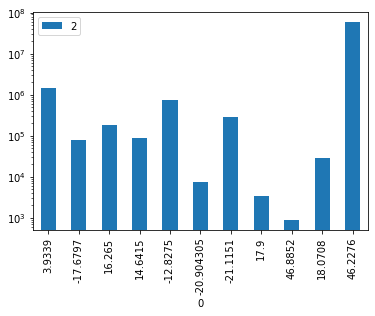

In [319]:
comparaison = pd.DataFrame(coord)
comparaison.plot.bar(0,2,logy=True)

## Génération du carte avec les points et le nombre de morts

In [320]:
map = folium.Map(tiles='OpenStreetMap', zoom_start=5)
map.save(outfile='mappoint.html')
for i in range(len(coord)):
    folium.Marker(location=(coord[i][0], coord[i][1]), popup = "Nombre de Morts " + str(coord[i][2])).add_to(map)
map.save(outfile='mappoint.html')

## Génération d'une carte avec des cercles qui ont pour rayons le nombre de mort (divisé par 1000000 pour eviter que cela soit trop gros)

In [321]:
map = folium.Map(tiles='OpenStreetMap', zoom_start=5)
map.save(outfile='mapcircle.html')
for i in range(len(coord)):
    folium.CircleMarker(
        location = (coord[i][0], coord[i][1]),
        radius = coord[i][2]/1000000,
        color = 'crimson',
        fill = True,
        fill_color = 'crimson',
        popup = "Nombre de Morts " + str(coord[i][2])
    ).add_to(map)
map.save(outfile='mapcircle.html')

# 2ème Partie

## Import data

In [322]:
url="https://raw.githubusercontent.com/opencovid19-fr/data/master/dist/chiffres-cles.csv"
c=pd.read_csv(url)

In [323]:
df1 = pd.DataFrame(c)

df1

,date,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,deces_ehpad,reanimation,hospitalises,nouvelles_hospitalisations,nouvelles_reanimations,gueris,depistes,source_nom,source_url,source_archive,source_type
0,2020-01-24,departement,DEP-16,Charente,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,NaN,agences-regionales-sante
1,2020-01-24,departement,DEP-17,Charente-Maritime,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,NaN,agences-regionales-sante
2,2020-01-24,departement,DEP-19,Corrèze,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,NaN,agences-regionales-sante
3,2020-01-24,departement,DEP-23,Creuse,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,NaN,agences-regionales-sante
4,2020-01-24,departement,DEP-24,Dordogne,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,NaN,agences-regionales-sante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27393,2020-10-01,region,REG-75,Nouvelle-Aquitaine,NaN,NaN,NaN,NaN,504.0,NaN,59.0,334.0,37.0,5.0,2766.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
27394,2020-10-01,region,REG-76,Occitanie,NaN,NaN,NaN,NaN,600.0,NaN,126.0,426.0,49.0,4.0,3751.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
27395,2020-10-01,region,REG-84,Auvergne-Rhône-Alpes,NaN,NaN,NaN,NaN,1937.0,NaN,143.0,822.0,82.0,13.0,9590.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
27396,2020-10-01,region,REG-93,Provence-Alpes-Côte d'Azur,NaN,NaN,NaN,NaN,1154.0,NaN,162.0,755.0,67.0,17.0,8174.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr


In [325]:
c2 = pd.read_csv("datasets/covid-19-pandemic-worldwide-data.csv", delimiter = ';') 

df2 = pd.DataFrame(c2)
df2

,Zone,Sub Zone,Category,Date,Count,Location
0,Saint Lucia,NaN,Recovered,2020-09-12,26,"13.9094,-60.9789"
1,Saint Lucia,NaN,Recovered,2020-05-17,18,"13.9094,-60.9789"
2,Saint Lucia,NaN,Recovered,2020-08-15,25,"13.9094,-60.9789"
3,Saint Lucia,NaN,Recovered,2020-02-10,0,"13.9094,-60.9789"
4,Saint Lucia,NaN,Recovered,2020-09-26,27,"13.9094,-60.9789"
...,...,...,...,...,...,...
197815,United Kingdom,Channel Islands,Recovered,2020-03-03,0,"49.3723,-2.3644"
197816,United Kingdom,Channel Islands,Recovered,2020-05-15,457,"49.3723,-2.3644"
197817,United Kingdom,Channel Islands,Recovered,2020-06-09,512,"49.3723,-2.3644"
197818,United Kingdom,Channel Islands,Recovered,2020-06-10,512,"49.3723,-2.3644"


## Nombre de personnes contaminées par pays

<AxesSubplot:xlabel='Zone'>

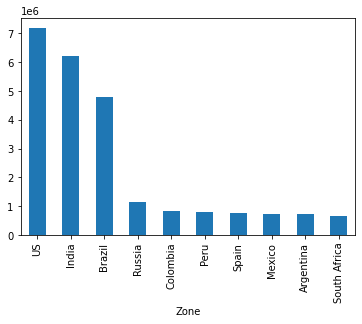

In [326]:
df_mask = df2['Category'] == 'Confirmed'
confirmed_df = df2[df_mask].groupby(['Zone'])['Count'].max().sort_values(ascending = False)[:10]
confirmed_df.plot.bar()

## Nom de personnes guéries par pays

<AxesSubplot:xlabel='Zone'>

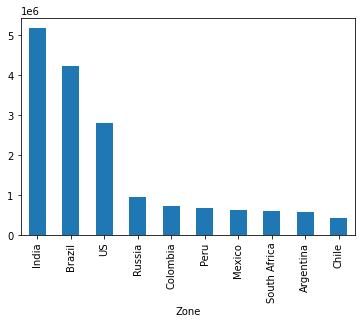

In [327]:
df_mask = df2['Category'] == 'Recovered'
recovered_df = df2[df_mask].groupby(['Zone'])['Count'].max().sort_values(ascending = False)[:10]
recovered_df.plot.bar()

## Nom de personnes mortes par pays

<AxesSubplot:xlabel='Zone'>

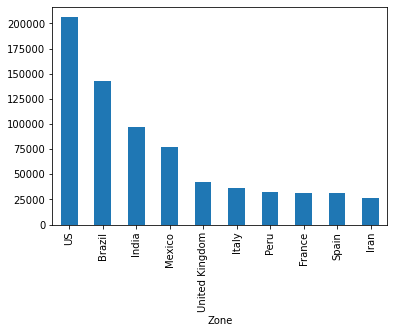

In [329]:
df_mask = df2['Category'] == 'Deaths'
deaths_df = df2[df_mask].groupby(['Zone'])['Count'].max().sort_values(ascending = False)[:10]
deaths_df.plot.bar()

## Pays avec le meilleur taux de décès en pourcentage

<AxesSubplot:xlabel='Zone'>

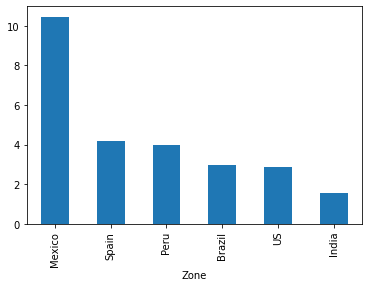

In [330]:
res_pos = ((deaths_df / confirmed_df) * 100).sort_values(ascending = False)[:10]
res_pos.replace([np.inf, -np.inf], np.nan).dropna().plot.bar()

## Pays avec le meilleur taux de guérison en pourcentage

<AxesSubplot:xlabel='Zone'>

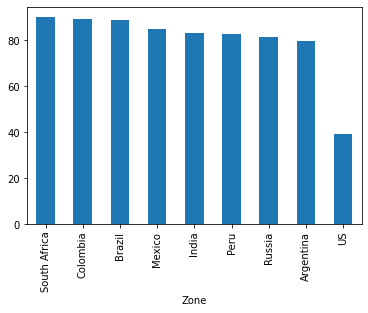

In [331]:
res_pos = ((recovered_df / confirmed_df) * 100).sort_values(ascending = False)[:10]
res_pos.replace([np.inf, -np.inf], np.nan).dropna().plot.bar()

# 3ème Partie

<ipython-input-345-c03a032d1e96>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res = subset[(subset['Category'] == 'Recovered')&(subset['Date'] == '2020-08-01')].groupby(['Zone'])['Category','Count','Date']
<ipython-input-345-c03a032d1e96>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res2 = subset[(subset['Category'] == 'Recovered')&(subset['Date'] == '2020-09-01')].groupby(['Zone'])['Category','Count','Date']


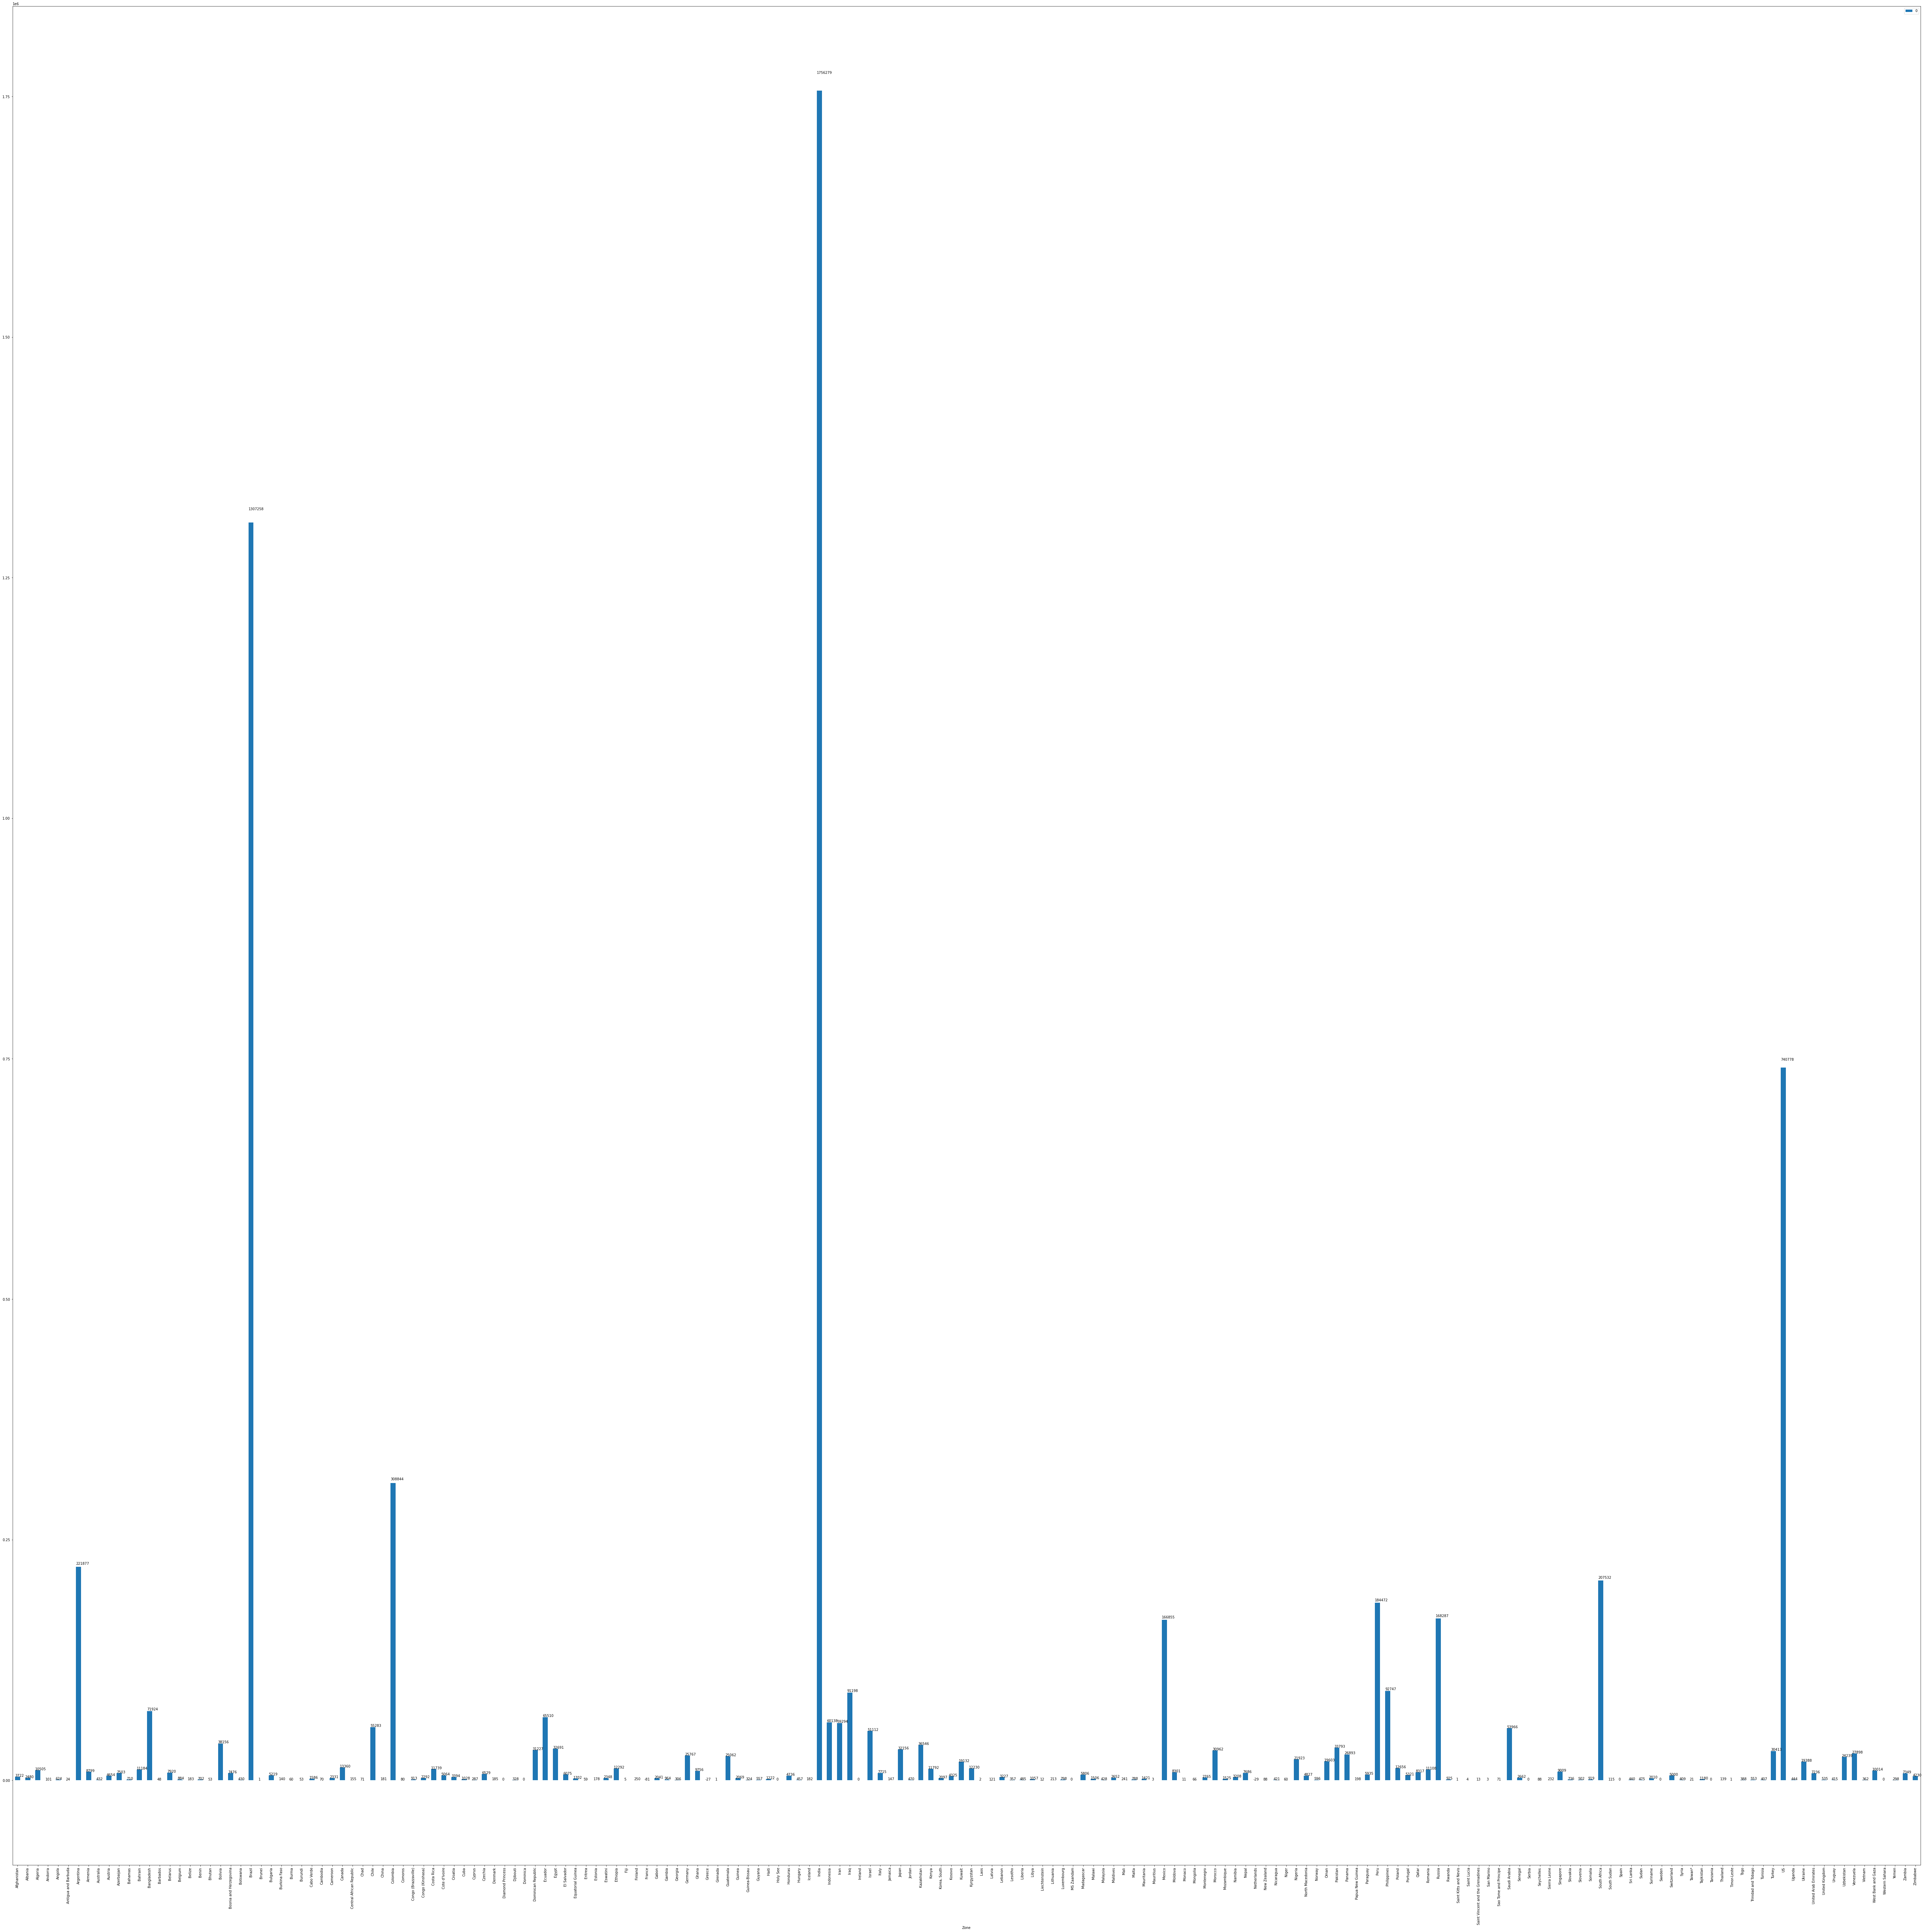

In [345]:
c3 = pd.read_csv("datasets/covid-19-pandemic-worldwide-data.csv", delimiter=';')
df_world = pd.DataFrame(c3)
subset = df_world[['Zone','Category','Date','Count']]
subset

res = subset[(subset['Category'] == 'Recovered')&(subset['Date'] == '2020-08-01')].groupby(['Zone'])['Category','Count','Date']
res = pd.DataFrame(res.first())


res2 = subset[(subset['Category'] == 'Recovered')&(subset['Date'] == '2020-09-01')].groupby(['Zone'])['Category','Count','Date']
res2 = pd.DataFrame(res2.first())
res2 = res2.rename(columns={'Count': 'Count2'})

res3 = pd.concat([res,res2],axis=1,sort=True)
resdif = res3['Count2']-res3['Count']
resdif = pd.DataFrame(resdif)

pl = resdif.plot.bar(figsize=(100, 100))

for p in pl.patches:
    pl.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))


In [334]:
c2 = pd.read_csv("datasets/covid-19-pandemic-worldwide-data.csv", delimiter = ';')

df = pd.DataFrame(c2)

df

,Zone,Sub Zone,Category,Date,Count,Location
0,Saint Lucia,NaN,Recovered,2020-09-12,26,"13.9094,-60.9789"
1,Saint Lucia,NaN,Recovered,2020-05-17,18,"13.9094,-60.9789"
2,Saint Lucia,NaN,Recovered,2020-08-15,25,"13.9094,-60.9789"
3,Saint Lucia,NaN,Recovered,2020-02-10,0,"13.9094,-60.9789"
4,Saint Lucia,NaN,Recovered,2020-09-26,27,"13.9094,-60.9789"
...,...,...,...,...,...,...
197815,United Kingdom,Channel Islands,Recovered,2020-03-03,0,"49.3723,-2.3644"
197816,United Kingdom,Channel Islands,Recovered,2020-05-15,457,"49.3723,-2.3644"
197817,United Kingdom,Channel Islands,Recovered,2020-06-09,512,"49.3723,-2.3644"
197818,United Kingdom,Channel Islands,Recovered,2020-06-10,512,"49.3723,-2.3644"


In [335]:
df_read = df[["Zone","Date","Category", "Count"]]
df_read

,Zone,Date,Category,Count
0,Saint Lucia,2020-09-12,Recovered,26
1,Saint Lucia,2020-05-17,Recovered,18
2,Saint Lucia,2020-08-15,Recovered,25
3,Saint Lucia,2020-02-10,Recovered,0
4,Saint Lucia,2020-09-26,Recovered,27
...,...,...,...,...
197815,United Kingdom,2020-03-03,Recovered,0
197816,United Kingdom,2020-05-15,Recovered,457
197817,United Kingdom,2020-06-09,Recovered,512
197818,United Kingdom,2020-06-10,Recovered,512


In [336]:
startDateSeptember = "2020-09-01"
endDateSeptember = "2020-09-30"
startDateAugust = "2020-08-01"
endDateAugust = "2020-08-30"

df_mask_date_september =( df_read["Date"] >= startDateSeptember ) & (df_read["Date"] <= endDateSeptember)
df_mask_date_august =( df_read["Date"] >= startDateAugust) & (df_read["Date"] <= endDateAugust)
df_mask_category_recovered = df_read["Category"] == "Recovered"
df_mask_france = df_read["Zone"] == "France"

In [337]:
df_filter = df_read[df_mask_category_recovered & df_mask_date_september].groupby(["Zone"])[["Category", "Count","Date"]].first()
df_filter

,Category,Count,Date
Zone,,,
Afghanistan,Recovered,31234,2020-09-12
Albania,Recovered,6106,2020-09-06
Algeria,Recovered,33723,2020-09-11
Andorra,Recovered,928,2020-09-06
Angola,Recovered,1277,2020-09-10
...,...,...,...
West Bank and Gaza,Recovered,29068,2020-09-27
Western Sahara,Recovered,8,2020-09-21
Yemen,Recovered,1160,2020-09-01


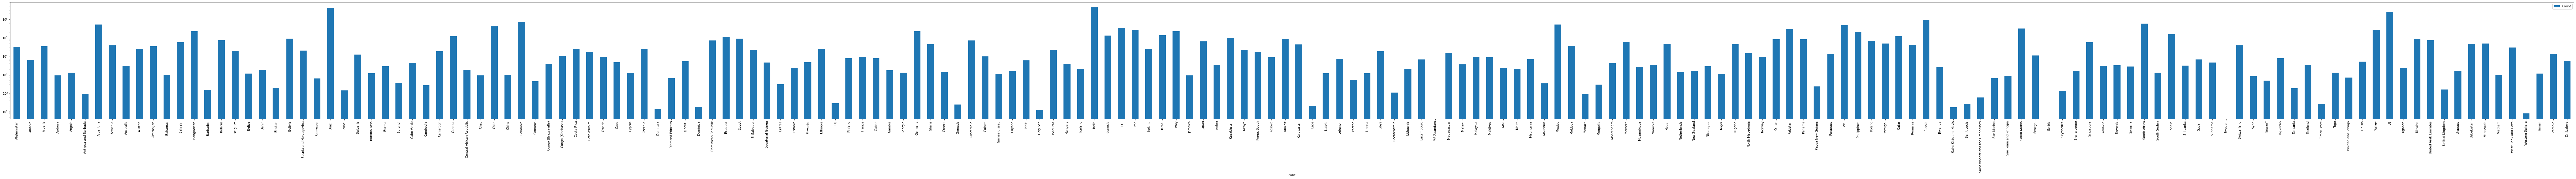

In [350]:
gg = df_filter.plot.bar(figsize=(150, 7),logy=True)

In [339]:
df_filter2 = df_read[df_mask_category_recovered & df_mask_date_august].groupby(["Zone"])[["Category", "Count","Date"]].first()
df_filter2

,Category,Count,Date
Zone,,,
Afghanistan,Recovered,25669,2020-08-04
Albania,Recovered,3871,2020-08-18
Algeria,Recovered,29886,2020-08-26
Andorra,Recovered,875,2020-08-19
Angola,Recovered,804,2020-08-21
...,...,...,...
West Bank and Gaza,Recovered,14291,2020-08-28
Western Sahara,Recovered,8,2020-08-22
Yemen,Recovered,1123,2020-08-30


In [340]:


df_filter3 = pd.concat([df_filter, df_filter2])
df_filter3['date'] = pd.to_datetime(df_filter3['Date'])   
#df_filter3.drop(columns =['Date'], inplace=True)
df_filter3.reset_index(level=0 , inplace = True)
df_filter3


,Zone,Category,Count,Date,date
0,Afghanistan,Recovered,31234,2020-09-12,2020-09-12
1,Albania,Recovered,6106,2020-09-06,2020-09-06
2,Algeria,Recovered,33723,2020-09-11,2020-09-11
3,Andorra,Recovered,928,2020-09-06,2020-09-06
4,Angola,Recovered,1277,2020-09-10,2020-09-10
...,...,...,...,...,...
371,West Bank and Gaza,Recovered,14291,2020-08-28,2020-08-28
372,Western Sahara,Recovered,8,2020-08-22,2020-08-22
373,Yemen,Recovered,1123,2020-08-30,2020-08-30
374,Zambia,Recovered,9126,2020-08-20,2020-08-20


In [341]:

df_filter3
df_filter3["delta"] = df_filter3.sort_values(['date']).groupby(['Zone'])['Count'].pct_change()
mask_filter_nan =  df_filter3["delta"].notnull()
df_filter3.delta = df_filter3.delta * 100
df_filter3[mask_filter_nan]




,Zone,Category,Count,Date,date,delta
0,Afghanistan,Recovered,31234,2020-09-12,2020-09-12,21.679847
1,Albania,Recovered,6106,2020-09-06,2020-09-06,57.737019
2,Algeria,Recovered,33723,2020-09-11,2020-09-11,12.838787
3,Andorra,Recovered,928,2020-09-06,2020-09-06,6.057143
4,Angola,Recovered,1277,2020-09-10,2020-09-10,58.830846
...,...,...,...,...,...,...
183,West Bank and Gaza,Recovered,29068,2020-09-27,2020-09-27,103.400742
184,Western Sahara,Recovered,8,2020-09-21,2020-09-21,0.000000
185,Yemen,Recovered,1160,2020-09-01,2020-09-01,3.294746
186,Zambia,Recovered,13365,2020-09-20,2020-09-20,46.449704


# 4ème Partie

# 1er Dataset: Chiffres clés de Covid-19 en France

In [154]:
url="https://raw.githubusercontent.com/opencovid19-fr/data/master/dist/chiffres-cles.csv"
c=pd.read_csv(url)

# Data

In [3]:
df1 = pd.DataFrame(c)

df1

,date,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,deces_ehpad,reanimation,hospitalises,nouvelles_hospitalisations,nouvelles_reanimations,gueris,depistes,source_nom,source_url,source_archive,source_type
0,2020-01-24,departement,DEP-16,Charente,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,NaN,agences-regionales-sante
1,2020-01-24,departement,DEP-17,Charente-Maritime,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,NaN,agences-regionales-sante
2,2020-01-24,departement,DEP-19,Corrèze,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,NaN,agences-regionales-sante
3,2020-01-24,departement,DEP-23,Creuse,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,NaN,agences-regionales-sante
4,2020-01-24,departement,DEP-24,Dordogne,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,NaN,agences-regionales-sante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27393,2020-10-01,region,REG-75,Nouvelle-Aquitaine,NaN,NaN,NaN,NaN,504.0,NaN,59.0,334.0,37.0,5.0,2766.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
27394,2020-10-01,region,REG-76,Occitanie,NaN,NaN,NaN,NaN,600.0,NaN,126.0,426.0,49.0,4.0,3751.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
27395,2020-10-01,region,REG-84,Auvergne-Rhône-Alpes,NaN,NaN,NaN,NaN,1937.0,NaN,143.0,822.0,82.0,13.0,9590.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
27396,2020-10-01,region,REG-93,Provence-Alpes-Côte d'Azur,NaN,NaN,NaN,NaN,1154.0,NaN,162.0,755.0,67.0,17.0,8174.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr


### Données cas confirmés par zone avec date la plus récente

In [156]:
g1 = df1.groupby('granularite')[['cas_confirmes','maille_nom','date']].max()
g1

,cas_confirmes,maille_nom,date
granularite,,,
collectivite-outremer,145.0,Wallis et Futuna,2020-04-08
departement,827.0,Yvelines,2020-10-01
monde,591971.0,Monde,2020-03-28
pays,577505.0,France,2020-10-01
region,7660.0,Île-de-France,2020-10-01


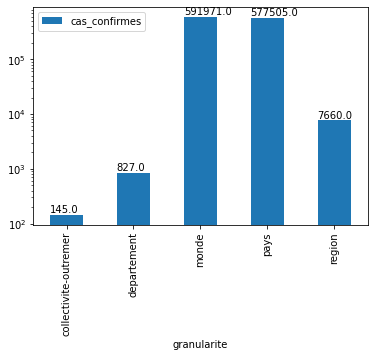

In [302]:
gr = g1.plot.bar(logy=True)

for p in gr.patches:
    gr.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.1))


In [167]:
df1.groupby('granularite')[['deces_ehpad','maille_nom','date']].max()

,deces_ehpad,maille_nom,date
granularite,,,
collectivite-outremer,NaN,Wallis et Futuna,2020-04-08
departement,NaN,Yvelines,2020-10-01
monde,NaN,Monde,2020-03-28
pays,10692.0,France,2020-10-01
region,NaN,Île-de-France,2020-10-01


In [95]:
dt_mx = df1[df1['granularite']=='pays'].groupby(['deces'])['date'].max()
dt_mx

deces
0.0        2020-02-13
1.0        2020-02-25
2.0        2020-03-01
3.0        2020-03-02
4.0        2020-03-04
              ...    
21201.0    2020-09-29
21240.0    2020-09-30
21264.0    2020-09-30
21303.0    2020-10-01
21327.0    2020-10-01
Name: date, Length: 373, dtype: object

In [115]:
st = df1[df1['granularite']=='pays'].groupby('date',as_index=False)['deces'].max()
st

,date,deces
0,2020-01-24,0.0
1,2020-01-25,0.0
2,2020-01-26,NaN
3,2020-01-27,0.0
4,2020-01-28,0.0
...,...,...
242,2020-09-27,21061.0
243,2020-09-28,21142.0
244,2020-09-29,21201.0
245,2020-09-30,21264.0


# Morts

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

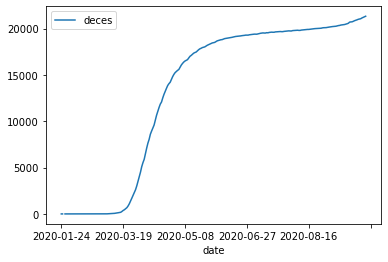

In [117]:
st.plot(x='date')

In [98]:
st_c = df1[df1['granularite']=='pays'].groupby('date',as_index=False)['cas_confirmes'].max()
st_c

,date,cas_confirmes
0,2020-01-24,3.0
1,2020-01-25,3.0
2,2020-01-26,3.0
3,2020-01-27,3.0
4,2020-01-28,4.0
...,...,...
242,2020-09-27,538569.0
243,2020-09-28,542639.0
244,2020-09-29,550690.0
245,2020-09-30,563535.0


# Malades

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

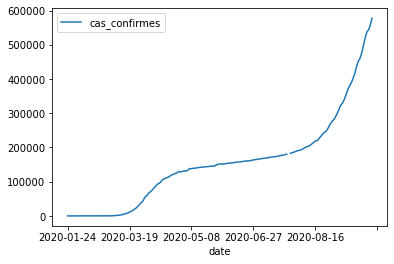

In [118]:
st_c.plot(x='date')

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

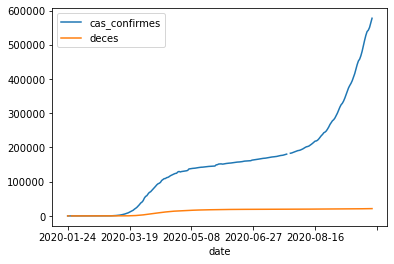

In [119]:
diff = df1[df1['granularite']=='pays'].groupby('date',as_index=False)[['cas_confirmes','deces']].max()
diff.plot(x='date')

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

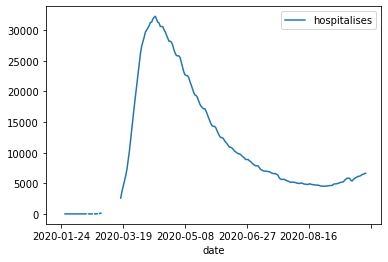

In [120]:
hop = df1[df1['granularite']=='pays'].groupby('date', as_index=False)['hospitalises'].max()
hop.plot(x='date')

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

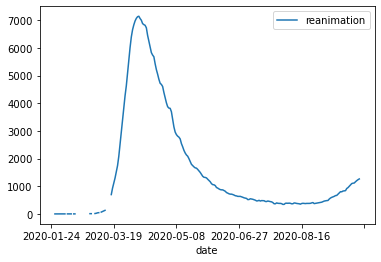

In [121]:
rea = df1[df1['granularite']=='pays'].groupby('date', as_index=False)['reanimation'].max()
rea.plot(x='date')

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

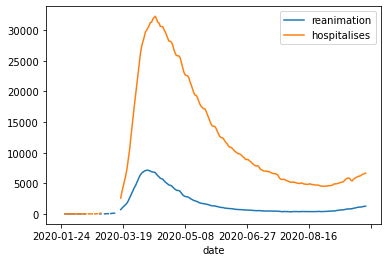

In [122]:
new = df1[df1['granularite']=='pays'].groupby('date', as_index=False)[['reanimation','hospitalises']].max()
new.plot(x='date')

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

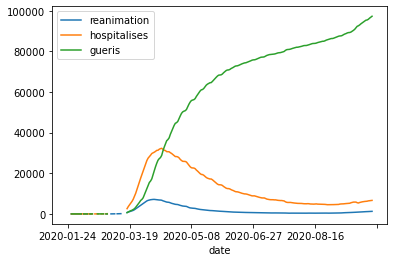

In [123]:
new2 = df1[df1['granularite']=='pays'].groupby('date', as_index=False)[['reanimation','hospitalises','gueris']].max()
new2.plot(x='date')

# Pics

In [153]:
pic = df1[df1['granularite']=='pays'].groupby('hospitalises')['date'].max()
pic.tail()

hospitalises
31826.0    2020-04-12
31952.0    2020-04-13
32113.0    2020-04-13
32131.0    2020-04-14
32292.0    2020-04-14
Name: date, dtype: object

In [152]:
pic_rea = df1[df1['granularite']=='pays'].groupby('reanimation')['date'].max()
pic_rea.tail()

reanimation
7019.0    2020-04-08
7066.0    2020-04-09
7072.0    2020-04-06
7131.0    2020-04-07
7148.0    2020-04-08
Name: date, dtype: object

# EHPAD

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

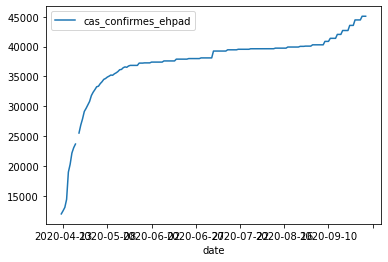

In [125]:
ep = df1[df1['granularite']=='pays'].groupby('date',as_index=False)['cas_confirmes_ehpad'].max()
ep.plot(x='date')

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

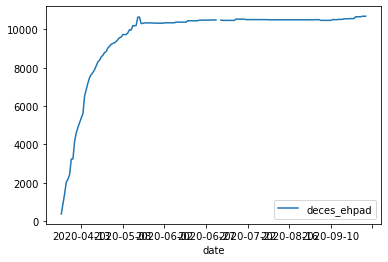

In [126]:
ep2 = df1[df1['granularite']=='pays'].groupby('date',as_index=False)['deces_ehpad'].max()
ep2.plot(x='date')

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

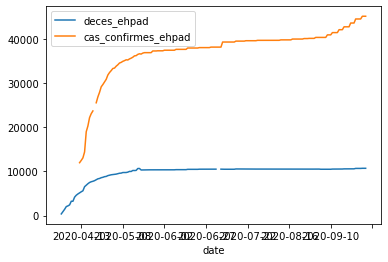

In [127]:
ep3 = df1[df1['granularite']=='pays'].groupby('date',as_index=False)[['deces_ehpad','cas_confirmes_ehpad']].max()
ep3.plot(x='date')

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

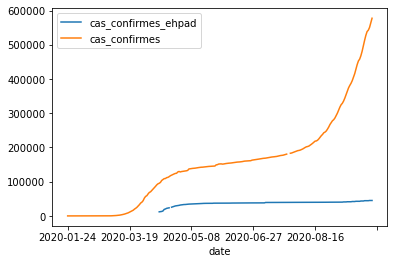

In [128]:
ep4 = df1[df1['granularite']=='pays'].groupby('date',as_index=False)[['cas_confirmes_ehpad','cas_confirmes']].max()
ep4.plot(x='date')

In [303]:
res3 = pd.concat([res,res2],axis=1,sort=True)
resdif = res3['Count2']-res3['Count']
resdif = pd.DataFrame(resdif)

pl = resdif.plot.bar(figsize=(150, 7),logy=True, title="Recovered aout-sept")

for p in pl.patches:
    pl.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.1))


In [259]:
cat_zone = df_world.groupby(['Category','Zone'])['Count'].sum()
cat_zone

Category   Zone              
Confirmed  Afghanistan           4370079
           Albania                784054
           Algeria               3889660
           Andorra                172683
           Angola                 192654
                                  ...   
Recovered  West Bank and Gaza    1024248
           Western Sahara           1160
           Yemen                   93580
           Zambia                 717814
           Zimbabwe               276877
Name: Count, Length: 564, dtype: int64

In [260]:
df_world['Date'].max()

'2020-09-29'